<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/DeepLearning_Task_2_Week_2_Classification_Covertdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 848.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Data Exploring

In [ ]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/compressed_data.csv.gz"
df = pd.read_csv(url, compression="gzip")
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [ ]:
df = df.dropna()
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Data preparation

In [ ]:
print(df['Cover_Type'].value_counts())

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


data oversampling

In [ ]:
#gunakan oversampling dan undersamling untuk membagi data karena sebarannya tidak merata
undersample = RandomUnderSampler(sampling_strategy={1: 30000, 2: 30000, 3: 30000})
X_under, y_under = undersample.fit_resample(X, y)

oversample = SMOTE(sampling_strategy={4: 30000, 5: 30000, 6: 30000, 7: 30000})
X_res, y_res = oversample.fit_resample(X_under, y_under)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pytorch

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values -1, dtype=torch.long).squeeze()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values -1, dtype=torch.long).squeeze()

In [ ]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=512, shuffle=True)

## Modeling Neural Network

In [ ]:
class Net(nn.Module):
    def __init__(self,input_size, n_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, n_classes)
        self.dropout = nn.Dropout(0.2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return self.softmax(x)

input_size = X_train.shape[1]

In [ ]:
n_classes = len(df['Cover_Type'].unique())
model_pytorch = Net(input_size, n_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

## Training Model

In [ ]:
epochs = 500 #menggunakan epoch yang banyak agar data yang dihasilkan optimal
for epoch in range(epochs):
    model_pytorch.train()
    optimizer.zero_grad()
    outputs = model_pytorch(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    model_pytorch.eval()
    with torch.no_grad():
      val_out = model_pytorch(X_test_tensor)
      val_loss = criterion(val_out, y_test_tensor)

    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

Epoch 1, Loss: 1.945940613746643, Val Loss: 1.9448398351669312
Epoch 2, Loss: 1.945073127746582, Val Loss: 1.943880558013916
Epoch 3, Loss: 1.9442226886749268, Val Loss: 1.9428929090499878
Epoch 4, Loss: 1.9433242082595825, Val Loss: 1.9418469667434692
Epoch 5, Loss: 1.942375898361206, Val Loss: 1.940724492073059
Epoch 6, Loss: 1.9413329362869263, Val Loss: 1.9395049810409546
Epoch 7, Loss: 1.940199613571167, Val Loss: 1.938164472579956
Epoch 8, Loss: 1.938956618309021, Val Loss: 1.9366751909255981
Epoch 9, Loss: 1.9375892877578735, Val Loss: 1.9350059032440186
Epoch 10, Loss: 1.935957431793213, Val Loss: 1.933124303817749
Epoch 11, Loss: 1.934227705001831, Val Loss: 1.9310035705566406
Epoch 12, Loss: 1.9322693347930908, Val Loss: 1.9286086559295654
Epoch 13, Loss: 1.9299825429916382, Val Loss: 1.9258995056152344
Epoch 14, Loss: 1.9275306463241577, Val Loss: 1.9228407144546509
Epoch 15, Loss: 1.924713134765625, Val Loss: 1.9193953275680542
Epoch 16, Loss: 1.9214122295379639, Val Loss: 

In [ ]:
model_pytorch.eval()
with torch.no_grad():
    y_pred_pytorch = model_pytorch(X_test_tensor).numpy()
    y_pred = y_pred_pytorch.argmax(axis=1)

In [ ]:
accuracy_pytorch = accuracy_score(y_test_tensor, y_pred)

akurasi untuk proporsi prediksi yang benar terhadap total data

akurasi = (True Positif + True Negatif) / (True Positif + True Negatif + False Positif + False Negatif)

In [ ]:
precision_pytorch = precision_score(y_test_tensor, y_pred, average='weighted')

presisi digunakan untuk prediksi positif yang benar terhadap total prediksi positif

presisi = True Positif/(True Positif+False Positif)

In [ ]:
recall_pytorch = recall_score(y_test_tensor, y_pred, average='weighted')

Recall digunakan untuk prediksi positif yang benar terhadap total data positif

Recall True Positif/(True Positif+False Negatif)

In [ ]:
f1_pytorch = f1_score(y_test_tensor, y_pred,average='weighted')

F1 digunakan untuk rata rata dari presisi dan recall

F1 = 2 * ((Presisi * Recall)/(Presisi + Recall))

In [ ]:
auc_pytorch = roc_auc_score(y_test_tensor, y_pred_pytorch,average='weighted', multi_class='ovo')

ROC dan AUC untuk mengevaluasi kinerja model klasifikasi biner. ROC adalah grafik, sedangkan AUC adalah nilai yang menggambarkan kinerja model.

In [ ]:
y_test_bin = label_binarize(y_test_tensor, classes=np.unique(y_test_tensor))
fpr_pytorch = dict()
tpr_pytorch = dict()
for i in range(n_classes):  # Assuming n_classes is 7
    fpr_pytorch[i], tpr_pytorch[i], _ = roc_curve(y_test_bin[:, i], y_pred_pytorch[:, i])

print(f'Akurasi: {accuracy_pytorch}\nPresisi: {precision_pytorch}\nRecall: {recall_pytorch}\nF1-Score: {f1_pytorch}\nAUC: {auc_pytorch}')

Akurasi: 0.7926428571428571
Presisi: 0.7912253250845889
Recall: 0.7926428571428571
F1-Score: 0.790266206618458
AUC: 0.9435150449639432


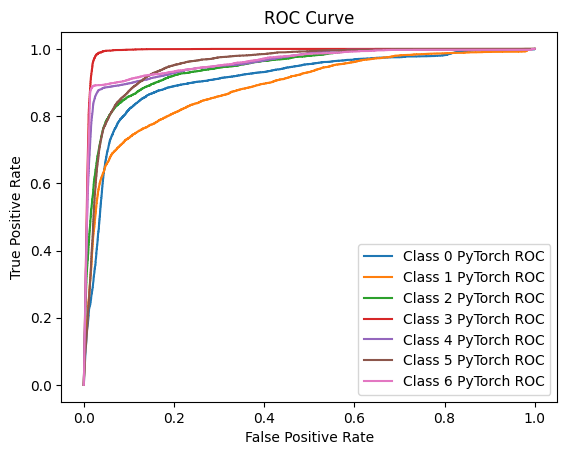

In [ ]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_pytorch[i], tpr_pytorch[i], label=f'Class {i} PyTorch ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Tensorflow

## Modeling Neural Network

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

In [ ]:
model_tf = tf.keras.Model(inputs=inputs, outputs=outputs)

# menggunakan early stopping untuk mengurangi overfitting pada model
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
model_tf.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy')

## Training Model

In [ ]:
history = model_tf.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: nan - val_loss: nan
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan


In [ ]:
y_pred_prob_tf = model_tf.predict(X_test).flatten()
y_pred_tf = (y_pred_prob_tf > 0.5).astype(int)

513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
accuracy_tf = accuracy_score(y_test, y_pred_tf)

akurasi untuk proporsi prediksi yang benar terhadap total data

akurasi = (True Positif + True Negatif) / (True Positif + True Negatif + False Positif + False Negatif)

In [ ]:
precision_tf = precision_score(y_test, y_pred_tf)

presisi digunakan untuk prediksi positif yang benar terhadap total prediksi positif

presisi = True Positif/(True Positif+False Positif)

In [ ]:
recall_tf = recall_score(y_test, y_pred_tf)

Recall digunakan untuk prediksi positif yang benar terhadap total data positif

Recall True Positif/(True Positif+False Negatif)

In [ ]:
f1_tf = f1_score(y_test, y_pred_tf)

F1 digunakan untuk rata rata dari presisi dan recall

F1 = 2 * ((Presisi * Recall)/(Presisi + Recall))

In [ ]:
roc_auc_tf = roc_auc_score(y_test, y_pred_prob_tf)

ROC dan AUC untuk mengevaluasi kinerja model klasifikasi biner. ROC adalah grafik, sedangkan AUC adalah nilai yang menggambarkan kinerja model.

In [ ]:
fpr_tensorflow, tpr_tensorflow, _ = roc_curve(y_test, y_pred_prob_tf)
print(f'Akurasi: {accuracy_tf}\nPresisi: {precision_tf}\nRecall: {recall_tf}\nF1-Score: {f1_tf}\nAUC: {roc_auc_tf}')

Akurasi: 0.8719590268886044
Presisi: 0.8694325808419768
Recall: 0.8736971183323115
F1-Score: 0.8715596330275229
AUC: 0.9518032413166378


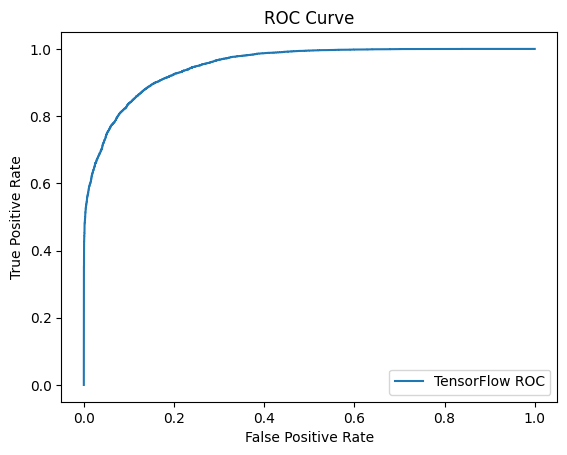

In [ ]:
plt.figure()
plt.plot(fpr_tensorflow, tpr_tensorflow, label='TensorFlow ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Matriks Evaluasi yang terbaik untuk klasifikasi adalah F1_score dan AUC karena dataset tidak seimbang (oversamping ke negatif)